# **Sarcasm detection using Natural Language Processing**
#### This model is being trained with dataset from Kaggle. Dataset sourced from TheOnion and HuffPost. Saracastic dataset from TheOnion and the serious tone data from HuffingtonPost


# **List of libraries used with documentation hyperlinks for reference**
*   [NumPy](https://numpy.org/doc/1.23/) 
*   [Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
*   [Matplotlib](https://matplotlib.org/2.0.2/api/pyplot_api.html)
*   [TensorFlow](https://www.tensorflow.org/guide/basics)

*   [Natural Language Tool Kit(nltk)](https://www.nltk.org/py-modindex.html)
*   [Regular Expressions(re)](https://docs.python.org/3/library/re.html)
*   [keras]()




In [1]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>" #Out of vocabulary tokens
training_size = 22000

In [4]:
filepath = input("Enter the file path")
with open(filepath, 'r') as f:
    data = [json.loads(line) for line in f]

sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

Enter the file path/content/drive/MyDrive/Colab Notebooks/Sarcasm Detection/Sarcasm Headlines Dataset.json


In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [7]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
625/625 - 2s - loss: 0.0232 - accuracy: 0.9940 - val_loss: 1.0905 - val_accuracy: 0.8044 - 2s/epoch - 4ms/step
Epoch 2/50
625/625 - 2s - loss: 0.0208 - accuracy: 0.9943 - val_loss: 1.1265 - val_accuracy: 0.8032 - 2s/epoch - 4ms/step
Epoch 3/50
625/625 - 2s - loss: 0.0202 - accuracy: 0.9949 - val_loss: 1.1707 - val_accuracy: 0.8025 - 2s/epoch - 4ms/step
Epoch 4/50
625/625 - 3s - loss: 0.0189 - accuracy: 0.9952 - val_loss: 1.2049 - val_accuracy: 0.8032 - 3s/epoch - 4ms/step
Epoch 5/50
625/625 - 4s - loss: 0.0192 - accuracy: 0.9946 - val_loss: 1.2599 - val_accuracy: 0.8028 - 4s/epoch - 6ms/step
Epoch 6/50
625/625 - 2s - loss: 0.0166 - accuracy: 0.9951 - val_loss: 1.3019 - val_accuracy: 0.7988 - 2s/epoch - 4ms/step
Epoch 7/50
625/625 - 3s - loss: 0.0148 - accuracy: 0.9961 - val_loss: 1.3408 - val_accuracy: 0.7993 - 3s/epoch - 4ms/step
Epoch 8/50
625/625 - 2s - loss: 0.0132 - accuracy: 0.9967 - val_loss: 1.3967 - val_accuracy: 0.7963 - 2s/epoch - 4ms/step
Epoch 9/50
625/625 - 2s 

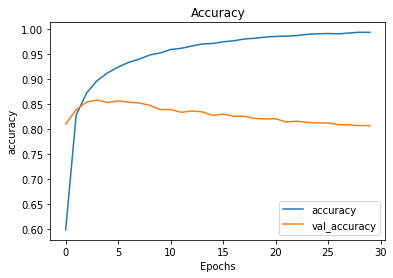

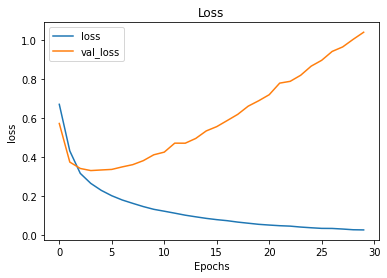

In [13]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plt.title("Accuracy")
plot_graphs(history, "accuracy")
plt.title("Loss")
plot_graphs(history, "loss")

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> scientists unveil doomsday clock of hair loss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [16]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
sentence = ["you are dumb", "Silence is golden. Duct tape is silver."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))
for i in range(len(sentence)):
  print(i)
  if model.predict(padded)[i] > 0.1:
    print("This is sarcastic")
  else:
    print("Take this seriously")

1/1 [==============================] - 0s 53ms/step
[[1.4182256e-06]
 [9.9981803e-01]]
0
1/1 [==============================] - 0s 34ms/step
Take this seriously
1
1/1 [==============================] - 0s 15ms/step
This is sarcastic
